In [ ]:
from keras.applications import VGG16

In [2]:
conv_base = VGG16(weights = "imagenet",
                 include_top = False,
                 input_shape = (150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [14]:
base_dir = "C:/Users/usaid/Downloads/dogs-vs-cats-small"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

In [15]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

In [17]:
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels =  np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size = batch_size,
        class_mode = "binary")
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [18]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [25]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = "relu", input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = "binary_crossentropy",
              metrics = ["acc"])

In [26]:
history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6129 - acc: 0.6610 - val_loss: 0.4443 - val_acc: 0.8310
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4333 - acc: 0.8015 - val_loss: 0.3595 - val_acc: 0.8660
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3543 - acc: 0.8555 - val_loss: 0.3186 - val_acc: 0.8800
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3159 - acc: 0.8720 - val_loss: 0.2947 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2845 - acc: 0.8845 - val_loss: 0.2788 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2695 - acc: 0.8925 - val_loss: 0.2797 - val_acc: 0.8860
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2515 - acc: 0.9050 - v

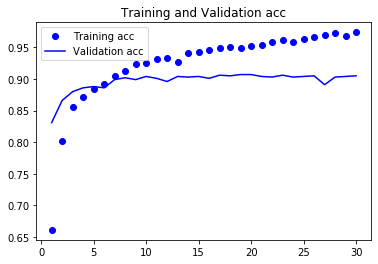

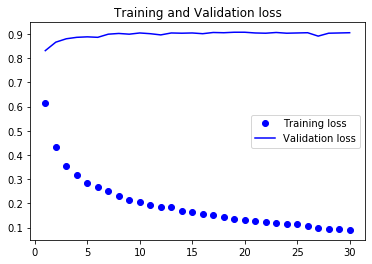

In [30]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_acc, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()